# WITH SEABORN

In [2]:
## import our libariries and implement warning code not to receive any warning

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

## read data

In [8]:
# use encoding here

kill = pd.read_csv("PoliceKillingsUS.csv", encoding = "windows-1252")
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [9]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Shape

In [10]:
kill.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [11]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

#### Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

In [12]:
kill.dropna(inplace=True)

<AxesSubplot:xlabel='gender', ylabel='age'>

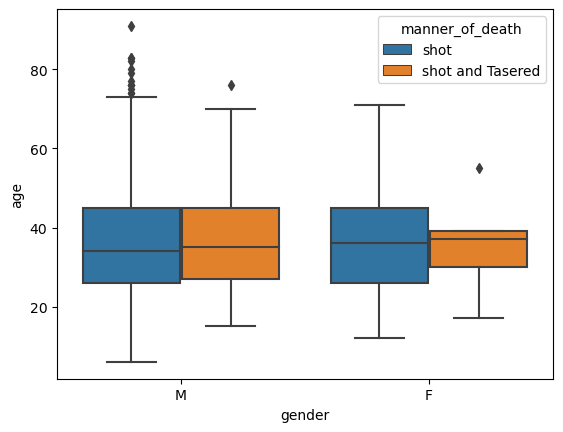

In [13]:
sns.boxplot(data=kill, x="gender", y="age", hue="manner_of_death")

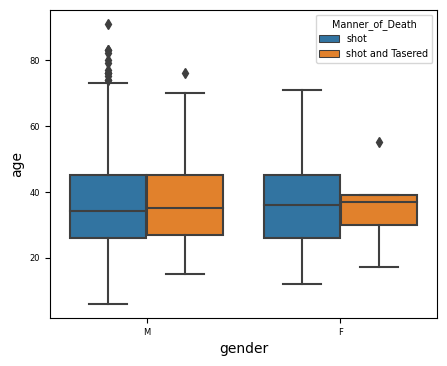

In [21]:
## Another way

fig, ax = plt.subplots(1,1,figsize= (5, 4))

sns.boxplot(data = kill, x = "gender", y = "age", hue = "manner_of_death",ax = ax)


plt.legend( title = 'Manner_of_Death',fontsize='x-small',title_fontsize= 'x-small')

ax.tick_params(axis = 'y', labelsize = 6)
ax.tick_params(axis = 'x', labelsize = 6)

## 1b: Swarm Plot 

#### Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

<AxesSubplot:xlabel='gender', ylabel='age'>

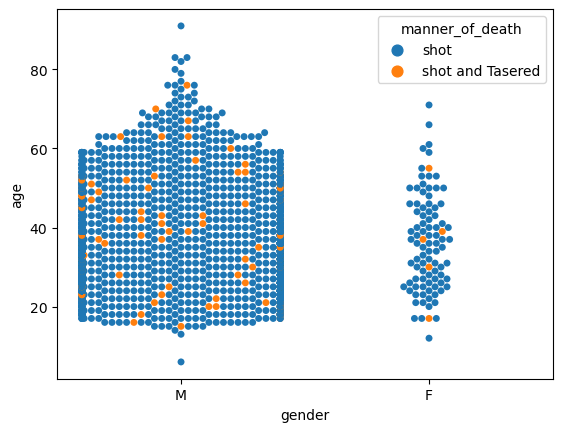

In [23]:
#tips = sns.load_dataset("df") --> SEABORN
sns.swarmplot(data=kill, x="gender", y="age", hue="manner_of_death")

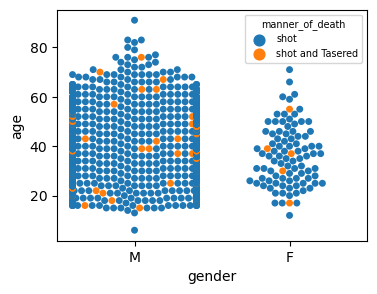

In [25]:
plt.figure(figsize=(4,3))

sns.swarmplot(data=kill, x = "gender", y= "age", hue="manner_of_death")

plt.legend( title = 'manner_of_death',fontsize='x-small',title_fontsize= 'x-small')

plt.show()

## 2: Plot 12 most dangerous cities

In [29]:
most_danger_12 = kill["city"].value_counts().nlargest(13).values 
most_danger_12

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13, 13], dtype=int64)

In [30]:
kill["city"].value_counts().nlargest(13)

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
Miami            15
San Antonio      15
Indianapolis     14
St. Louis        14
Bakersfield      13
Oklahoma City    13
Name: city, dtype: int64

In [31]:
most_dangerous_cities =kill["city"].value_counts().head(13)
print(most_dangerous_cities)

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
Miami            15
San Antonio      15
Indianapolis     14
St. Louis        14
Bakersfield      13
Oklahoma City    13
Name: city, dtype: int64


In [32]:
# Bring Values
np.array(most_dangerous_cities)

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13, 13], dtype=int64)

In [33]:
# Bring their Index
most_dangerous_cities.index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Bakersfield', 'Oklahoma City'],
      dtype='object')

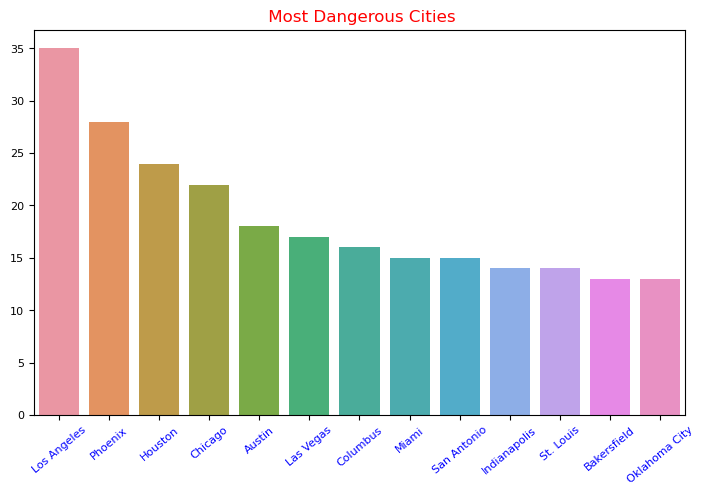

In [34]:
# With Seaborn: 
plt.figure(figsize=(8.4,5))

sns.barplot(x=most_dangerous_cities.index, y=most_dangerous_cities.values)

plt.xticks(rotation=40,color="blue",fontsize= 8)
plt.yticks(fontsize=8)
plt.title(" Most Dangerous Cities", color="red")

plt.show() 

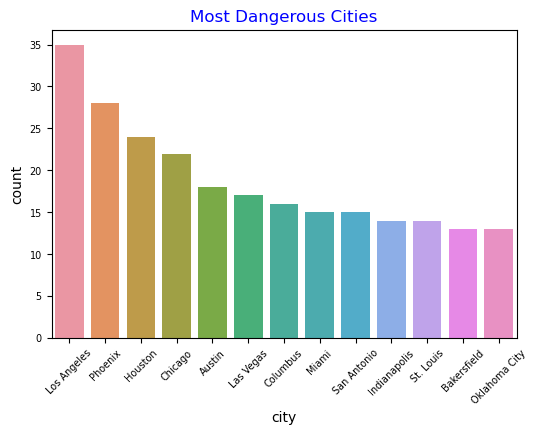

In [35]:
plt.figure(figsize=(6,4))

sns.countplot(x="city", data=kill, order=most_dangerous_cities.index)

plt.xticks(rotation=45,fontsize=7)
plt.yticks(fontsize=7)

plt.title("Most Dangerous Cities", color='blue')

plt.show()

## 3: Plot 20 most dangerous states

In [44]:
most_dangerous_states =kill["state"].value_counts().head(20)
print(most_dangerous_states)

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64


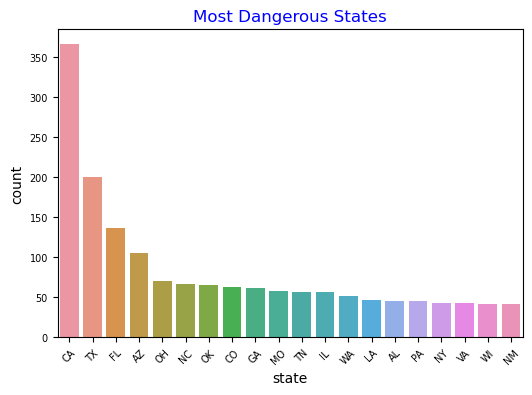

In [45]:
plt.figure(figsize=(6,4))

sns.countplot(x="state", data=kill, order=most_dangerous_states.index)

plt.xticks(rotation=45,fontsize=7)
plt.yticks(fontsize=7)

plt.title("Most Dangerous States", color='blue')

plt.show()

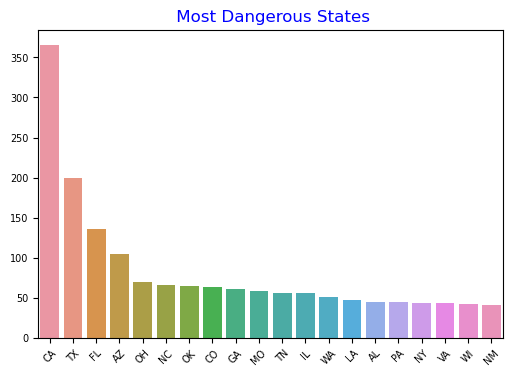

In [48]:
## BARPLOT 

plt.figure(figsize=(6,4))   

sns.barplot(x=most_dangerous_states.index, y=most_dangerous_states.values)

plt.xticks(rotation=45,fontsize=7)
plt.yticks(fontsize=7)

plt.title(" Most Dangerous States", color="blue") 

plt.show()

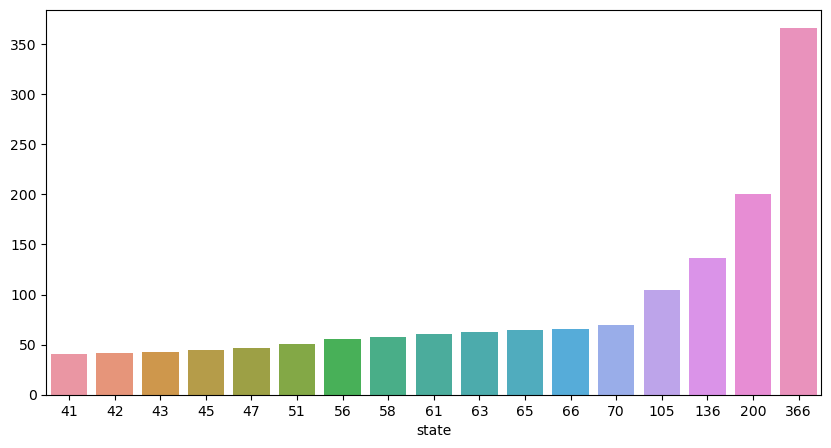

In [123]:
## BARPLOT

plt.figure(figsize=(10,5))

sns.barplot(data=most_dangerous_states, x =most_dangerous_states.index, y = most_dangerous_states.values);

plt.show()

## 4: Plot Having mental ilness or not for killed people

In [49]:
kill.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [50]:
kill[(kill.signs_of_mental_illness == True) | (kill.signs_of_mental_illness == False)]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [53]:
mental_status = kill["signs_of_mental_illness"].value_counts()
mental_status

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

In [54]:
plt.figure(figsize=(4,3)) 

sns.barplot(y=ill)
plt.yticks(fontsize=7)
plt.show()

NameError: name 'ill' is not defined

<Figure size 400x300 with 0 Axes>

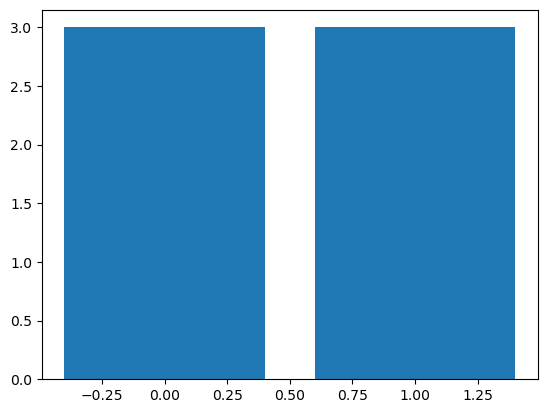

In [98]:
fig, ax = plt.subplots() ## Did not work

ax.bar(kill.signs_of_mental_illness, height=3);
plt.show()

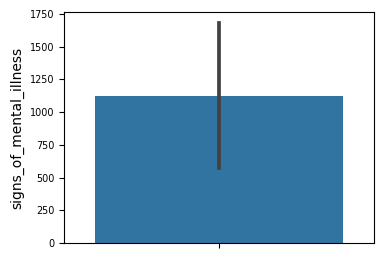

In [55]:
plt.figure(figsize=(4,3)) # Still not clear for me what gaves this chart us?

sns.barplot(y=mental_status)
plt.yticks(fontsize=7)
plt.show()

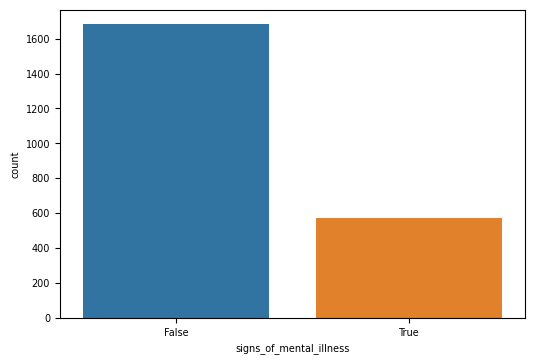

In [56]:
plt.figure(figsize=(6,4))

sns.barplot(x=mental_status.index, y=mental_status.values)
plt.xlabel("signs_of_mental_illness",fontsize=7)
plt.ylabel("count",fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.show()

## 5: Plot number of Threat Types

In [57]:
threat_level=kill["threat_level"].value_counts()
threat_level

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

## 6: Plot number of Flee Types

In [58]:
flee_type=kill["flee"].value_counts()
flee_type

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

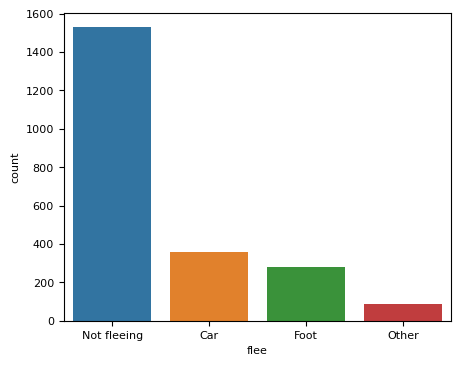

In [59]:
plt.figure(figsize=(5,4))

sns.barplot(x=flee_type.index, y=flee_type.values)
plt.xlabel("flee",fontsize=8)
plt.ylabel("count",fontsize=8)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8) 
plt.show()

# End of the Work..